# TP1 - Méthodes classiques

algorithme préalable:

In [1]:
import numpy as np
import matplotlib 
import pandas as pd

In [2]:
"""
Distance euclidienne : 
La distance euclidienne se calcule en soustrayant les coordonnées puis en les mettant au carré puis en additionnant les distances et de faire la racine du résultat 
"""

def dist_euclid(p1,p2):
    return np.sqrt(np.sum(np.square(p2-p1)))

"""
Distance de Manhattan :
La distance de Manhattan se calcule en additionnant les coordonnées en abscisse et en ordonnée
"""

def distance_Manhattan(p1,p2):
    if p1.shape == p2.shape :
        for ii in range(p1.shape):
            resultat += p2[i] - p1[i]
        return resultat
    else: # celui la ?
        print("Vous devez prednre des points avec le même nombre de dimensions")
    

"""
Distance de Hamming :
La distance de Hamming est le calcul d'une distance grâce à un XOR. 
Si les coordonnées sont les mêmes, alors cela vaut zéri sinon la valeur vaut un. Puis il faut faire l'addition des valeurs obtenus.
"""

def distance_Hamming(p1,p2):
    if p1.shape == p2.shape :
        return np.sum(p1^p2)
    else :
        print("Vous devez prendre des points avec le même nombre de dimensions")



            

In [3]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

### ALgorithme KPPV :
En reconnaissance de forme, l'algorithme des k plus proches voisins (k-NN) est une méthode non paramétrique utilisée pour la classification et la régression. Dans les deux cas, il s'agit de classer l'entrée dans la catégorie à laquelle appartient les k plus proches voisins dans l'espace des caractéristiques identifiées par apprentissage.

In [4]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


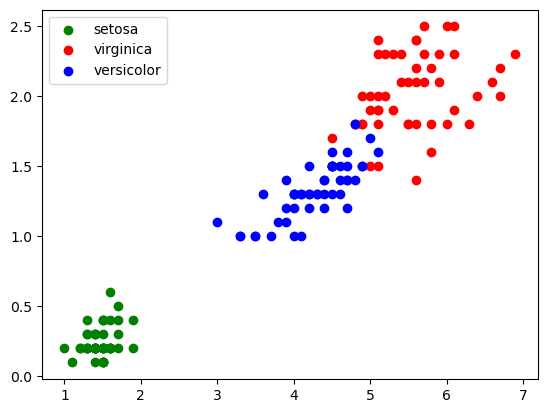

In [5]:
import pandas
import matplotlib.pyplot as plt
# Importation des données
iris = pandas.read_csv("iris.csv")
x = iris.loc[:,"petal_length"]
y = iris.loc[:,"petal_width"]
lab = iris.loc[:,"species"]
# Affichage des données
for e, c in [('setosa','g'), ('virginica', 'r'), ('versicolor', 'b')]:
    plt.scatter(x[lab == e], y[lab == e], color = c, label = e)
plt.legend()
fig = plt.gcf()
plt.show()

In [6]:
def algo_KPPV(p1,K):
    K_voisin=np.array(K)
    for ii in iris:
        min(distance_Euclidienne(p1,ii))

import numpy as np
from collections import Counter 
"""
Cette fonction est l'algorithme kppv (k plus proche voisins) pour la dataframe Iris
:param data la base de donnée
:param xt : la donnée test
:param k : le nombre de voisins les plus proches
:param d : la fonction de calcule de distance (j'en ai fait 3 Euclidienne,Manhattan,Hamming)
"""
def kppv(data,xt,k,d): 
    assert k < data.shape[0] #je vérifie que k < n  n étant la taille du jeu de donnée
    resultat=[] #tableau des distances ainsi que l'espèce correspondant à la donnée comparer
    frequence=[] #tableau de fréquence des espèces de fleurs
    for index, row in data.iterrows(): 
        resultat.append((d(np.array((row["sepal_length"], row["petal_length"])),(xt["sepal_length"],xt["petal_length"])),row["species"]))
        #le résultat est sous la forme d'un tuple (distance,espèce)
    resultat.sort() #je trie par ordre croissant
    resultat=resultat[:k] #je prend que les k premiers qui seront les k plus proches voisins
    frequence=[x[1] for x in resultat] #je prend que les espèces de fleurs
    xt["species"]=Counter(frequence).most_common(1)[0][0] #je prend l'espèce de fleur qui a le plus de voisins dans la liste et je change l'espèce de
    #la donnée test
    return xt #je sais pas trop quoi renvoyer du coup je renvoie la donnée test
        
kppv(iris,iris.iloc[50],5,dist_euclid)
        


/var/folders/ts/kww6z2z510xb35njpx1_8q8m0000gn/T/ipykernel_12957/1164803147.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["species"]=Counter(frequence).most_common(1)[0][0] #je prend l'espèce de fleur qui a le plus de voisins dans la liste et je change l'espèce de


sepal_length           7.0
sepal_width            3.2
petal_length           4.7
petal_width            1.4
species         versicolor
Name: 50, dtype: object

### ZEROR

In [7]:
import numpy as np
from collections import Counter 
"""
Cette fonction correspond à l'algorithme de classification zeroR pour le jeu de donnée Iris en fonction de la fréquence des espèces
:param data le jeu de donnée
"""
def zeroR(data):
    frequence=data["species"]
    return Counter(frequence).most_common(1)[0][0]

zeroR(iris)

'setosa'

### ONER

In [8]:
import numpy as np
from collections import Counter 
from fractions import Fraction
"""
Cette fonction représente l'algorithm ONER pour le jeu de donnée Iris en fonction de son espèce
:param data le jeu de donnée iris
"""
def oneR(data,classe):
    regles=[] #les règles que je vais stocker
    tauxErreur=1 #et le taux d'erreur
    dataWOS=data[data.columns.difference([classe])] 
    #dataWOS = dataWithOutSpecies le jeu de donnée sans la colonne espèce
    for (columnName, columnData) in dataWOS.items(): #pour chaque colonne je fais la fonction frequence qui retourne un tuple (regles,tauxErreur)
        tmp=frequence(data,columnData,columnName,classe)
        if tmp[1]<tauxErreur: 
            regles=tmp[0]
            tauxErreur=tmp[1]
    return (regles,tmp)

def frequence(data,featureData,featureName,classe):
    tab=[]
    groups={}
    freq=[]
    regles=[]
    ind=0
    for value in featureData: #je parcours chaque valeur de la feature 
        tab.append((value,data._get_value(ind,classe,takeable=False))) #je stock dans mon tableau tab un tuple (valeur,classe)
        ind+=1
        
    for x, y in tab: #je regroupe dans un dictionnaire en mettant (valeur : [classe]) key=valeur value=[classe]
        tmp = groups.get(x, [])
        tmp.append(y)
        groups[x] = tmp
        
    for key,value in groups.items():#pour chaque élément de mon dictionnaire
        class_most_freq=Counter(value) #je prend l'espèce le plus commun pour chaque valeur
        print(class_most_freq)
        freq.append(list(class_most_freq.values())[-1]) #je l'ajoute dans un tableau de frequence pour faire le calcul de taux d'erreur
        print(freq)
        regle=f"SI {featureName} = {key} ALORS {class_most_freq[0]}" #je créé ma règle
        regles.append(regle) #je l'ajoute dans mon tableau de règles
    tauxErreur=Fraction(sum(freq),len(featureData))
    print(regles, tauxErreur)
    
    return (regles, tauxErreur) #je renvoie un tuple (regles,taux d'erreur)
#oneR(iris,'species')
   

### ONER avec golf(weather)

In [9]:
csv_url = './golf-dataset.csv'
golf =  pd.read_csv(csv_url)

In [10]:
golf

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [11]:
oneR(golf,'Play Golf')


Counter({'No': 4, 'Yes': 3})
[3]
Counter({'Yes': 6, 'No': 1})
[3, 1]
['SI Humidity = High ALORS 0', 'SI Humidity = Normal ALORS 0'] 2/7
Counter({'No': 3, 'Yes': 2})
[2]
Counter({'Yes': 4})
[2, 4]
Counter({'Yes': 3, 'No': 2})
[2, 4, 2]
['SI Outlook = Rainy ALORS 0', 'SI Outlook = Overcast ALORS 0', 'SI Outlook = Sunny ALORS 0'] 4/7
Counter({'No': 2, 'Yes': 2})
[2]
Counter({'Yes': 4, 'No': 2})
[2, 2]
Counter({'Yes': 3, 'No': 1})
[2, 2, 1]
['SI Temp = Hot ALORS 0', 'SI Temp = Mild ALORS 0', 'SI Temp = Cool ALORS 0'] 5/14
Counter({'Yes': 6, 'No': 2})
[6]
Counter({'No': 3, 'Yes': 3})
[6, 3]
['SI Windy = False ALORS 0', 'SI Windy = True ALORS 0'] 9/14


(['SI Humidity = High ALORS 0', 'SI Humidity = Normal ALORS 0'],
 (['SI Windy = False ALORS 0', 'SI Windy = True ALORS 0'], Fraction(9, 14)))

### Naif Bayesien

In [12]:
import numpy as np
import pandas as pd
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [13]:
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
def listing_elem(liste):
    elem = Counter(liste)
    return dict(elem)

dico = listing_elem(titanic)

In [15]:
nb_elem = sum(list(dico.values()))
print(nb_elem)

11


In [16]:
def moyenne(dico, key):
    return sum(dico[key])/nb_elem

def variance(dico,key):
    return (sum( (dico[key]-moyenne(dico,key))**2) / nb_elem)

print(moyenne(titanic,'pclass'))
print(variance(titanic,'pclass'))

187.0
2763039.272727273


In [17]:
# proba de valeur dans une meme classe ou la somme des probas vaut 1
def proba_priori(dico,key,value):
    dico = dict(Counter(dico[key]))
    return dico[value]/nb_elem

# proba p tel que Ev(p) = log (p) - log(1 - p)
def proba_evidence(dico,key,value):
    value = proba_priori(dico,key,value)
    evidence = np.log(value) - np.log(1-value)
    return evidence

# gaussienne par moi
def gaussienne(dico,key,value):
    moyen = moyenne(dico,key)
    varian = variance(dico,key)
    return (1/(varian*np.sqrt(2 * np.pi)) *      np.exp(-1/2 * ((value - moyen) / varian)**2))

In [18]:
proba_priori(titanic,'pclass',3)

44.63636363636363

In [19]:
proba_evidence(titanic,'pclass',3)

/var/folders/ts/kww6z2z510xb35njpx1_8q8m0000gn/T/ipykernel_12957/997291010.py:9: RuntimeWarning: invalid value encountered in log
  evidence = np.log(value) - np.log(1-value)


nan

In [20]:
gaussienne(titanic,'pclass',3)

1.4438530912485564e-07

# K-moyennes

In [32]:
import random

def fonction_erreur(A = [], mu = []):
    return 1
    
#Définition des centroides au départ 

def definition_centroide(data,k):
    mu = []
    for i in range(k):
        liste_coordonnees_centroide = []
        for columnName,columnData in data.items():
            liste_coordonnees_centroide.append(columnData[random.randint(0,len(data))])
        mu.append(liste_coordonnees_centroide)
    return mu
            

# affectation des points aux classes
def affectation_classes(data,A,mu):
    liste_per_classes = {i: [] for i in range(len(mu))}
    for index, row in data.iterrows():
        d=(dist_euclid(mu[0],row),row,0)
        if(len(mu)>1):
            for i in range(1,len(mu)):
                if d[0]<dist_euclid(mu[i],row):
                    d=(dist_euclid(mu[i],row),row,i)
        liste_per_classes[d[2]].append(d[1])      
    for i in range(len(mu)):
        A.append(liste_per_classes[i])
    return A

# modification des coordonnées des centroides pour reduire le taux d'erreur

def calcul_nouveau_centroide(data, A, mu):
    liste_centroide = []
    temporel2 = []
    moyenne =[]
    moyenne_coordonnees = []
    for ii in range (len(mu)):
        liste_coordonnees_centroide = []
        for jj in range(len(A)):
            tempo=A[jj]
            moyenne = []
            for kk in range(len(tempo)):
                temporel2.append(tempo[kk])
            
            moyenne.append(np.mean(temporel2)) # moyenne d'une coordonnée       
        liste_coordonnees_centroide.append(moyenne) # moyenne des coordonnées pour centroide 
            
        liste_centroide.append(liste_coordonnees_centroide) # ajout des coordonnées d'un centroide 
    
    return liste_centroide



def k_moyennes(data,k):
    assert k < data.shape[0] #je vérifie que k < n  n étant la taille du jeu de donnée
    mu=[] #matrice de centroïdes
    A= [] #matrice d'affectation
    dataWOS=iris.drop('species',axis=1) #j'enlève la colonne des espèces de fleurs
    mu = definition_centroide(data,k)
    print(mu)
    A=affectation_classes(dataWOS,A,mu)
    print(mu)
    mu = calcul_nouveau_centroide(data,A,mu)
    A=affectation_classes(dataWOS,A,mu)
    print(mu)
    mu = calcul_nouveau_centroide(data,A,mu)
    
    print(mu)
    fig = plt.figure()
    #ax = fig.add_subplot(111)  # Créer un sous-plot 3D

    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
    
    # Afficher les points de données
    ax.scatter(dataWOS.iloc[:, 0], dataWOS.iloc[:, 1], c='b', marker='o', label='Data Points')
    # Afficher les centroïdes
    mu = np.array(mu)
    # mu doit correspondre aux trois principales composantes
    ax.scatter(mu[0],mu[1],mu[2],  c='r', marker='X', s=1000, label='Centroids')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('K-Means Clustering in 3D')
    ax.legend()

    plt.show()
    print(mu)
    return mu,moyenne_mu,nb_iter

In [33]:
k_moyennes(iris.drop('species', axis=1), 3)

[[6.9, 3.4, 1.5, 0.2], [6.2, 2.9, 4.8, 2.0], [7.7, 3.4, 1.3, 0.2]]
[[6.9, 3.4, 1.5, 0.2], [6.2, 2.9, 4.8, 2.0], [7.7, 3.4, 1.3, 0.2]]


/Users/apple/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/apple/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Length of values (1) does not match length of index (4)

/Users/apple/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/apple/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/apple/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


IndexError: list index out of range

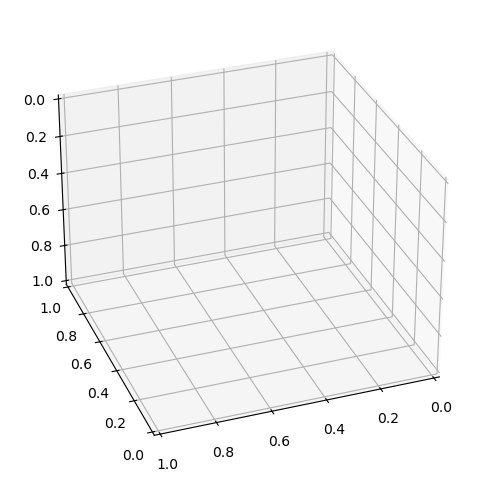

In [130]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.drop('species', axis=1))
ax.scatter(
    A[0],
    A[1],
    A[0],
    s=40
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()